In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import datetime

In [44]:
df = pd.read_csv('stats.csv')
df

,method,start_time,end_time,total_time,total_process,motif_N,matrix_N
0,CUDA,2024-02-21 10:39:37,2024-02-21 10:39:42,4.711344,6.584263,5,8
1,CUDAMPI,2024-02-21 10:40:34,2024-02-21 10:40:38,4.663196,6.537976,5,8
2,MPI,2024-02-21 10:42:16,2024-02-21 10:42:17,0.673160,0.673502,5,8
3,NORMAL,2024-02-21 10:43:06,2024-02-21 10:43:06,0.674784,0.675029,5,8
4,NORMAL,2024-02-21 10:43:59,2024-02-21 10:50:59,420.941429,421.094123,5,10
5,NORMAL,2024-02-21 10:51:42,2024-02-21 12:53:13,7291.257677,7293.885027,6,10
6,MPI,2024-02-21 13:19:33,2024-02-21 13:19:55,22.020082,22.019097,5,10
7,MPI,2024-02-21 13:19:33,2024-02-21 13:20:04,30.925756,30.884621,5,10
8,MPI,2024-02-21 13:19:33,2024-02-21 13:20:05,31.917140,31.912158,5,10
9,MPI,2024-02-21 13:19:33,2024-02-21 13:20:09,36.553888,36.521887,5,10


In [45]:
df.total_time.loc[df['method'] == 'CUDA']

0       4.711344
24     32.102685
25    166.941895
26    707.790895
Name: total_time, dtype: float64

In [50]:
NORMAL = df[['total_time', 'total_process', 'motif_N']].loc[df['method'] == 'NORMAL'].loc[df['matrix_N'] == 10].sort_values(by=['motif_N']).reset_index(drop=True)
CUDA = df[['total_time', 'total_process', 'motif_N']].loc[df['method'] == 'CUDA'].loc[df['matrix_N'] == 10].sort_values(by=['motif_N']).reset_index(drop=True)
MPI = df[['total_time', 'total_process', 'motif_N']].loc[df['method'] == 'MPI'].loc[df['matrix_N'] == 10].groupby(['motif_N']).max().sort_values(by=['motif_N']).reset_index()
NORMAL

,total_time,total_process,motif_N
0,29.009599,29.025010,4
1,420.941429,421.094123,5
2,7291.257677,7293.885027,6


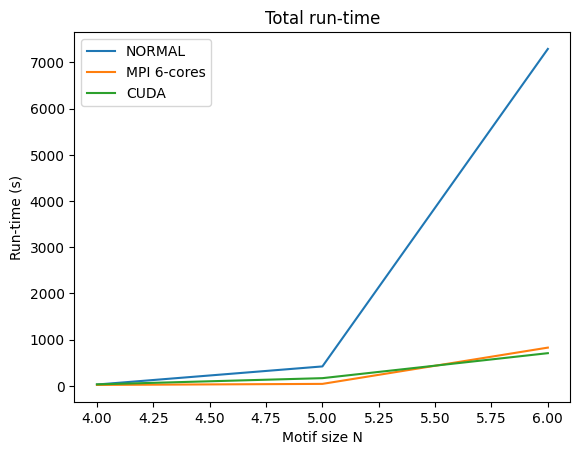

In [51]:
plt.plot(NORMAL.motif_N, NORMAL.total_time, label = "NORMAL")
plt.plot(MPI.motif_N, MPI.total_time, label = "MPI 6-cores")
plt.plot(CUDA.motif_N, CUDA.total_time, label = "CUDA")
plt.legend()
plt.title("Total run-time")
plt.xlabel("Motif size N")
plt.ylabel("Run-time (s)")
plt.savefig('run-time.png')
plt.show()

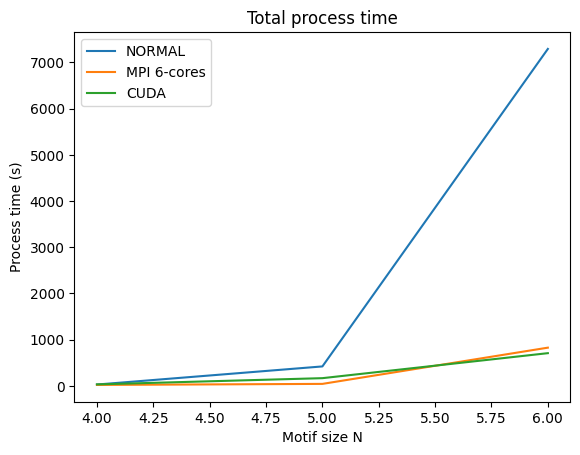

In [52]:
plt.plot(NORMAL.motif_N, NORMAL.total_process, label = "NORMAL")
plt.plot(MPI.motif_N, MPI.total_process, label = "MPI 6-cores")
plt.plot(CUDA.motif_N, CUDA.total_process, label = "CUDA")
plt.legend()
plt.title("Total process time")
plt.xlabel("Motif size N")
plt.ylabel("Process time (s)")
plt.savefig('process-time.png')
plt.show()

In [54]:
print('Velicina motifa==6')
print()
print('NORMAL:   ',str(datetime.timedelta(seconds=NORMAL.total_time.loc[NORMAL['motif_N'] == 6].values[0])))
print('MPI:      ',str(datetime.timedelta(seconds=MPI.total_time.loc[MPI['motif_N'] == 6].values[0])))
print('CUDA:     ',str(datetime.timedelta(seconds=CUDA.total_time.loc[CUDA['motif_N'] == 6].values[0])))

Velicina motifa==6

NORMAL:    2:01:31.257677
MPI:       0:13:48.005274
CUDA:      0:11:47.790895
